# Problem: Sampling from a Numberical Distribution (Weibull Distribution)

Give some probability density function (PDF) of continuous random variable, ones may be interested in the question: How to generate values of a continuous random variable from its CDF?

In most cases, we have library. However, it is worth investigating a random number generator (RNG) and its mechanism at a basic level. One of the most basic method for RNGs is based on the inverse transform method for continuous random variables; see the theoretical background in p. 5.

In this case study, we consider the Weibull distribution.
Probability density function (PDF) of a Weibull random variable with two parameters is given by

$p(x;\lambda,v)$ = \begin{cases}
              \frac{v}{\lambda}(\frac{x}{\lambda})^{v-1}e^{-(\frac{x}{\lambda})^v}, &\text{x $\geqslant$ 0} \\
              0, &\text{otherwise} &\text{(1)}
              \end{cases}

where ν > 0 is the shape parameter and λ > 0 is the scale parameter of the distribution.
In this problem, we limit ourselves to work only with λ = 1. Therefore the density function becomes

$p(x;v)$ = \begin{cases}
              v x^{v-1}e^{-x^v}, &\text{x $\geqslant$ 0} \\
              0, &\text{otherwise} &\text{(2)}
              \end{cases}

and the CFD is determined by

F(x) = $\int_{\infty}^x p(t;v)dt = \begin{cases}
\int_{\infty}^x v t^{v-1}e^{-t^v}dt, &\text{x $\geqslant 0$} \\
0, &\text{otherwise}
\end{cases}
= \begin{cases}
1-e^{-x^v} &\text{x $\geqslant$ 0}\\
0, &\text{otherwise}
\end{cases}$

Hence, see p. 5, a Weibull random variable X can be generated from the equality

U = F(X) $\iff$ U = $1 - e^{-X^v}$,

which gives

X = $\log^{\frac{1}{v}} (\frac{1}{1-U}), \text{U ∈ U(0, 1)}$.

Theorem in p. 5 showes that X determined in this way has a Weibull distribution.
So far one has two random number generators:

• RNG based on the inverse transform method:

    def our_weibull ( nu, N ):
      return np.log(1./( np.ones(N) - np.random.uniform( 0.0, 1.0, size=N)) )**(1./nu)

• RNG from Numpy:

    def lib_weibull ( nu, N ):
      return np.random.weibull( nu, N )

This problem aims at verifying whether those generators are equivalent or not.

For this purpose ones design a framework for numerical experiments.

**Numerical experiment design**

Given ν > 0 some real number that plays the role of the shape parameter. Put a = 0. Let
b > 0 be large enough such that p(x; ν) is small as $x ∉ R (a, b)$.

###*1. Binning:* For K $\in$ N. Let us fix the value of K in this context. Define

$a_k = a + k\delta, b_k = a +(k+1)\delta, k = \overline{0, K - 1}, \delta = \frac{b-a}{K}, \text{(3)}$

and

$c_k = \frac{1}{2}(a_k + b_k), k = \overline{0, K - 1}, \text{(4)}$

from which we can see that $|b_k - a_k| = \delta$ and

$[a, b] = [a_0, b_0] \cup [a_1, b_1]\cup...\cup[a_{K-1}, b_{K-1}].  \text{(5)}$

###**2.** Generate randomly N numbers using our_weibull with the given ν. Let $A_N$ be the set of such numbers.
###**3.** For every $k = \overline{0, K - 1}$, count the number of elements in $A_N$ , namely nk, within the interval [a_k, b_k].
###**4.** Put $M = \sum {k =0}^{K=1} n_k$ and define

$f_k = \frac{1}{\delta}\frac{n_k}{M}, k = \overline{0, K - 1}. \text{(6)}$

Note that

$\delta \sum{k=0}^{K =1}f_k = 1 \text{(7)}$

###**5.** Plot $f_k$ versus $c_k$ after taking some K appropriately and fixing its value. Note from the definiton of $f_k$ that

$\delta f_k = \underbrace{\frac{n_k}{M}}_{\text{Relative frequency}} \simeq \int _{a_k}^{b_k} p(x;v)dx \simeq |b_k - a_k|p(\frac{1}{2}(a_k + b_k);v) = \delta p(c_k;v). \text{(8)}$

Thus

$f_k \simeq p(c_k;v) \text{(9)}$

for M large and δ small.

###**6.** Visualize to see that $f_k$ approaches the exact probability distribution $p(x; ν)$ at $x = c_k$, for every k, as N becomes large.

1. Choose a, b, K. Compute $\delta, a_k, b_k, c_k$
2. For any N, generate $A_N$ .
3. Compute $n_k$ to obtain $f_k$.
4. Visualize the tendency $f_k \to p(c_k; ν)$ as N becomes large, for some sufficiently small $\delta$ given in advance.


**Question of Problem**

**Can you make a test to decide whether samples generated by our weibull and by lib weibull come from the same distribution?**

In [3]:
import numpy as np
from datascience import *
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import kstest

In [4]:
def our_weibull(nu, N):
    return np.log(1. / (np.ones(N) - np.random.uniform(0.0, 1.0, size=N))) ** (-1 / nu)

In [5]:
def lib_weibull(nu, N):
    return np.random.weibull(nu, N)

In [6]:
nu = 2.3
N = 500
K = 15
a = 0
b = 3

In [7]:
samples_ours_weibull = our_weibull(nu, N)
print("samples_ours_weibull: ", samples_ours_weibull)
samples_lib_weibull = lib_weibull(nu, N)
print("samples_lib_weibull: ", samples_lib_weibull)

samples_ours_weibull:  [ 0.62722766  0.67415897  0.4954577   0.71683324  0.89058951  0.84358608
  0.94659409  1.69927484  1.78466086  2.24583567  1.75896507  0.93965555
  1.66094679  2.15261809  0.98730778  0.88202624  0.8926805   1.56311262
  1.16204204  1.63671249  1.27624781  1.54676019  1.49518793  1.33047175
  2.85963319  0.66922128  0.72040184  0.79795262  1.05174717  1.5627904
  0.6739629   1.1893329   1.51284494  2.72494395  1.00890377  1.10522291
  1.03527828  1.56353773  3.92873257  3.96754565  1.98448674  0.82682804
  1.94561146  0.48784034  0.96934949  1.7739438   0.62844264  1.8426364
  1.25769626  1.06225983  0.97623536  1.28571928  3.2612648   0.91268625
  0.74191992  1.18134063  1.42737463  0.67770706  1.74290756  0.99627332
  1.28484723  0.93538206  0.72637732  2.25309836  1.3044262   0.48126497
  1.47074306  1.54823453  2.13699461  0.76138102  0.58543475  1.53506816
  0.86824136  1.66404755  0.92681505  0.85054879  4.26756483  1.07411746
  0.81021766  0.80542832  1.55

In [8]:
delta = (b - a) / K
bins = np.linspace(a, b, K + 1)
print("bins: ", bins)

bins:  [ 0.   0.2  0.4  0.6  0.8  1.   1.2  1.4  1.6  1.8  2.   2.2  2.4  2.6  2.8
  3. ]


In [9]:
midpoints = (bins[1:] + bins[:-1]) / 2
print("midpoints: ", midpoints)

midpoints:  [ 0.1  0.3  0.5  0.7  0.9  1.1  1.3  1.5  1.7  1.9  2.1  2.3  2.5  2.7  2.9]


In [10]:
freq_ours_weibull, _ = np.histogram(samples_ours_weibull, bins=bins)
print("freq_ours_weibull: ", freq_ours_weibull)
freq_lib_weibull, _ = np.histogram(samples_lib_weibull, bins=bins)
print("freq_lib_weibull: ", freq_lib_weibull)

freq_ours_weibull:  [ 0  1 22 84 80 62 52 48 37 24 17 16 11  9  7]
freq_lib_weibull:  [17 45 89 88 83 66 53 32 18  5  3  1  0  0  0]


In [11]:
freq_ours_weibull = freq_ours_weibull / (N * delta)
print("freq_ours_weibull: ", freq_ours_weibull)
freq_lib_weibull = freq_lib_weibull / (N * delta)
print("freq_lib_weibull: ", freq_lib_weibull)

freq_ours_weibull:  [ 0.    0.01  0.22  0.84  0.8   0.62  0.52  0.48  0.37  0.24  0.17  0.16
  0.11  0.09  0.07]
freq_lib_weibull:  [ 0.17  0.45  0.89  0.88  0.83  0.66  0.53  0.32  0.18  0.05  0.03  0.01
  0.    0.    0.  ]


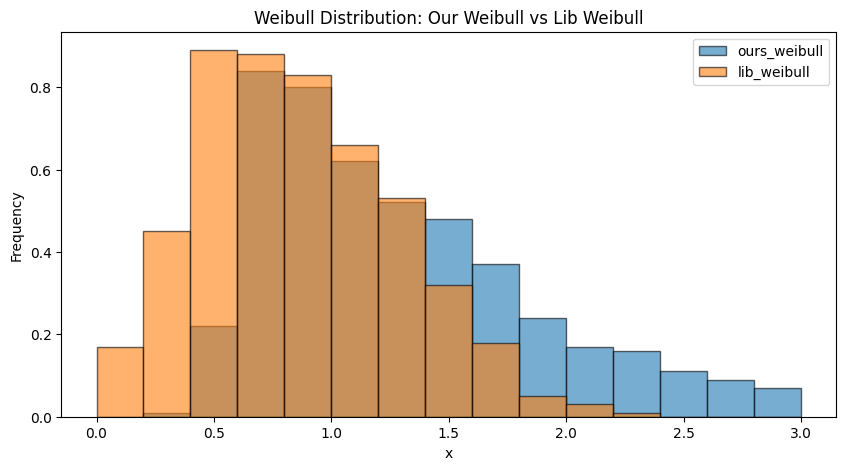

In [12]:
plt.figure(figsize=(10, 5))
plt.bar(midpoints, freq_ours_weibull, width=delta, label="ours_weibull", alpha = 0.6)
plt.bar(midpoints, freq_lib_weibull, width=delta, label="lib_weibull", alpha = 0.6)
plt.title('Weibull Distribution: Our Weibull vs Lib Weibull')
plt.xlabel('x')
plt.ylabel('Frequency')
plt.legend()

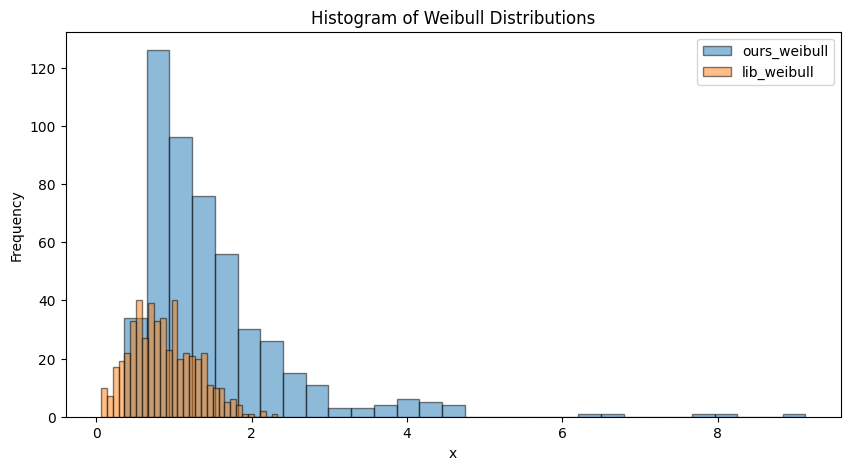

In [13]:
plt.figure(figsize=(10, 5))
plt.hist(samples_ours_weibull, bins=30, alpha=0.5, label="ours_weibull")
plt.hist(samples_lib_weibull, bins=30, alpha=0.5, label="lib_weibull")
plt.title('Histogram of Weibull Distributions')
plt.xlabel('x')
plt.ylabel('Frequency')
plt.legend()
plt.show()

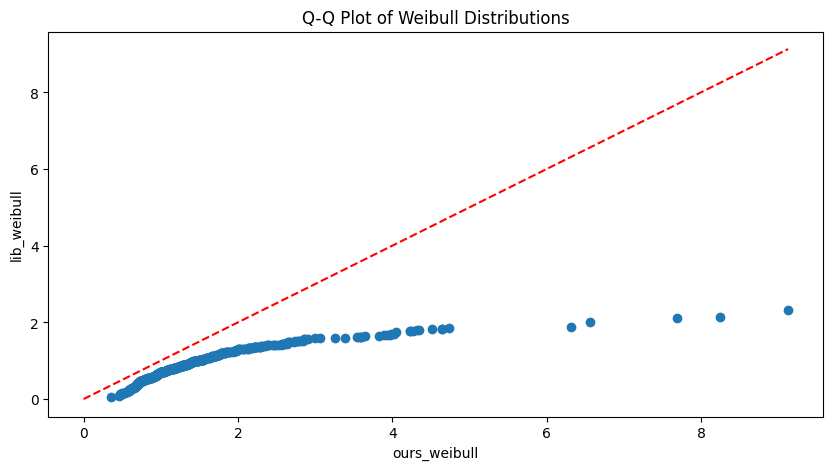

In [16]:
plt.figure(figsize=(10, 5))
plt.scatter(np.sort(samples_ours_weibull), np.sort(samples_lib_weibull))
plt.plot([0, max(samples_ours_weibull)], [0, max(samples_ours_weibull)], color='red', linestyle='--')
plt.title('Q-Q Plot of Weibull Distributions')
plt.xlabel('ours_weibull')
plt.ylabel('lib_weibull')
plt.show()

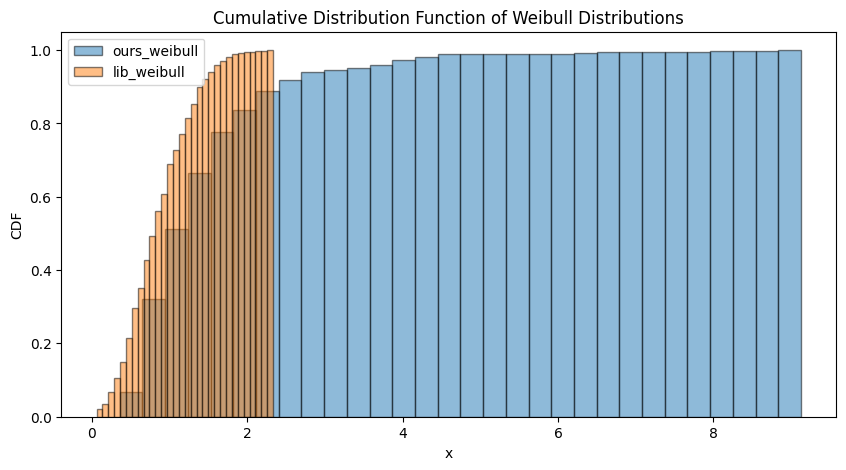

In [17]:
plt.figure(figsize=(10, 5))
plt.hist(samples_ours_weibull, bins=30, cumulative=True, density=True, alpha=0.5, label="ours_weibull")
plt.hist(samples_lib_weibull, bins=30, cumulative=True, density=True, alpha=0.5, label="lib_weibull")
plt.title('Cumulative Distribution Function of Weibull Distributions')
plt.xlabel('x')
plt.ylabel('CDF')
plt.legend()
plt.show()

In [14]:
ks_stat, p_value = kstest(samples_ours_weibull, samples_lib_weibull)
print("ks_stat: ", ks_stat)
print("p_value: ", p_value)

ks_stat:  0.29
p_value:  6.20891529807e-19


In [15]:
if p_value < 0.05:
    print("We reject the null hypothesis that the two distributions are the same.")
else:
    print("We fail to reject the null hypothesis that the two distributions are the same.")

We reject the null hypothesis that the two distributions are the same.
